In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

In [25]:
# Importing data
in_time = pd.read_csv("in_time.csv")
out_time = pd.read_csv("out_time.csv")
general_data = pd.read_csv("general_data.csv")
employee_survey_data = pd.read_csv("employee_survey_data.csv")
manager_survey_data = pd.read_csv("manager_survey_data.csv")

ara = pd.merge(general_data, employee_survey_data, on='EmployeeID',how='left')
main = pd.merge(ara, manager_survey_data, on='EmployeeID',how='left')

In [26]:
# Cleaning data
in_time.dropna(axis=1, how='all',inplace=True)
out_time.dropna(axis=1, how='all',inplace=True)

in_time.fillna(0, inplace=True)
out_time.fillna(0, inplace=True)

In [27]:
in_time.head()

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,...,0,0,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,2015-01-02 10:15:44,2015-01-05 10:21:05,0,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,2015-01-15 09:37:57,...,2015-12-17 09:15:08,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,0,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,2015-01-15 09:55:11,...,2015-12-17 09:53:17,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,2015-01-15 10:00:50,...,2015-12-17 09:54:36,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,2015-01-15 10:06:12,...,2015-12-17 09:46:35,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [28]:
# Changing index
in_time.set_index('Unnamed: 0',inplace=True)
out_time.set_index('Unnamed: 0',inplace=True)

In [29]:
# Converting to datetime
in_time.iloc[:, :] = in_time.iloc[:, :].apply(pd.to_datetime, errors='coerce')
out_time.iloc[:, :] = out_time.iloc[:, :].apply(pd.to_datetime, errors='coerce')

In [30]:
time_spent = (out_time - in_time)
total_time_spent = pd.DataFrame(time_spent.sum(axis=1))

In [31]:
time_spent.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,...,0 days 00:00:00,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
2,0 days 08:06:33,0 days 07:27:17,NaT,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,...,0 days 07:55:42,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,NaT,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
3,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,...,0 days 07:13:06,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
4,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,0 days 06:54:28,...,0 days 07:27:21,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
5,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,0 days 08:24:13,...,0 days 08:19:12,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05


In [32]:
total_time_spent.head()

,0
Unnamed: 0,
1,71 days 06:41:13
2,75 days 21:40:36
3,70 days 17:12:15
4,70 days 10:30:52
5,81 days 17:30:46


In [33]:
in_time['worked_days_count'] = in_time.notnull().sum(axis=1)

In [34]:
total_time_spent['total_seconds']= (total_time_spent).iloc[:,0].dt.total_seconds()

In [35]:
total_time_spent['average_seconds'] = total_time_spent['total_seconds']/in_time['worked_days_count']

In [36]:
time_spent['Non_Working_Days'] = time_spent.isna().sum(axis=1)
total_time_spent= pd.merge(time_spent['Non_Working_Days'], total_time_spent, left_index=True, right_index=True,how='left')

In [37]:
total_time_spent.drop(columns=total_time_spent.columns[1], axis=1, inplace=True)

In [38]:
total_time_spent

,Non_Working_Days,total_seconds,average_seconds
Unnamed: 0,,,
1,0,6158473.0,24732.823293
2,12,6558036.0,27671.037975
3,7,6109935.0,25247.665289
4,14,6085852.0,25897.242553
5,3,7061446.0,28705.065041
...,...,...,...
4406,6,7455288.0,30680.197531
4407,8,5286247.0,21934.634855
4408,18,6408835.0,27743.874459


In [39]:
data= pd.merge(main, total_time_spent, left_on='EmployeeID', right_index=True,how='left')

In [40]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Storing label encoders for each categorical column
label_encoders = {}

# Encoding categorical columns
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Imputing missing values with column mean
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

print(data.isnull().sum())

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
Non_Working_Days           0
total_seconds              0
average_seconds            0
dtype: int64


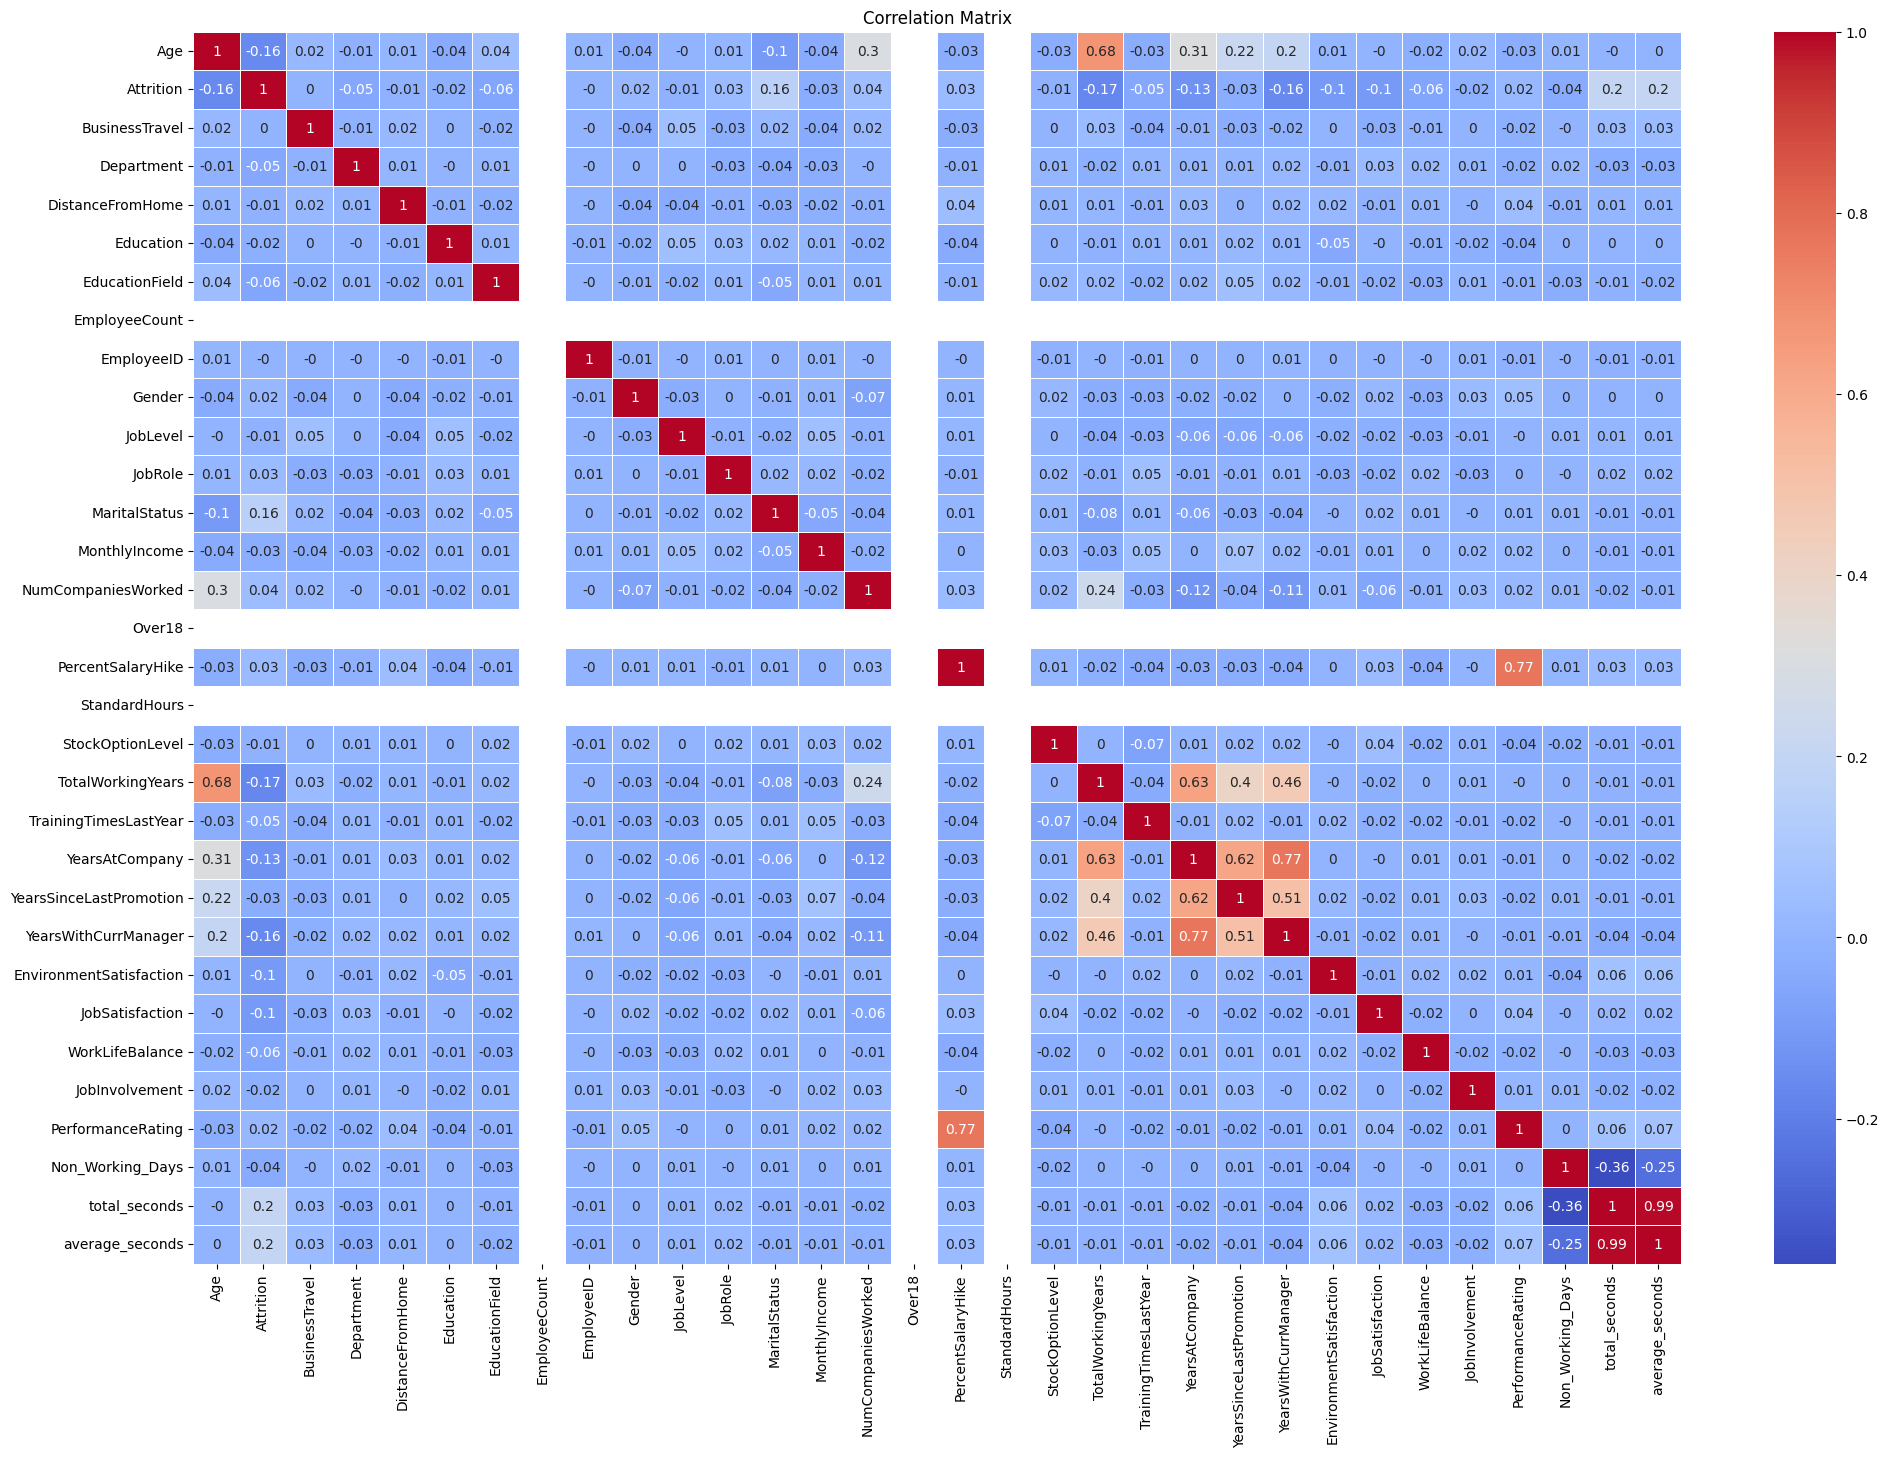

Attrition                  1.00
average_seconds            0.20
total_seconds              0.20
MaritalStatus              0.16
NumCompaniesWorked         0.04
JobRole                    0.03
PercentSalaryHike          0.03
PerformanceRating          0.02
Gender                     0.02
EmployeeID                -0.00
BusinessTravel             0.00
DistanceFromHome          -0.01
StockOptionLevel          -0.01
JobLevel                  -0.01
Education                 -0.02
JobInvolvement            -0.02
MonthlyIncome             -0.03
YearsSinceLastPromotion   -0.03
Non_Working_Days          -0.04
Department                -0.05
TrainingTimesLastYear     -0.05
EducationField            -0.06
WorkLifeBalance           -0.06
EnvironmentSatisfaction   -0.10
JobSatisfaction           -0.10
YearsAtCompany            -0.13
YearsWithCurrManager      -0.16
Age                       -0.16
TotalWorkingYears         -0.17
EmployeeCount               NaN
Over18                      NaN
Standard

In [41]:
corr_matrix = data.corr().round(2)

plt.figure(figsize=(24, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

print(corr_matrix['Attrition'].sort_values(ascending=False))

In [42]:
!pip install xgboost

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features = data.drop('Attrition', axis=1)
target = data['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

import xgboost as xgb
# Defining the model with better parameters
model = xgb.XGBClassifier(
    n_estimators=150,  # Increasing the number of trees
    max_depth=5,  # Increasing the maximum depth of trees
    learning_rate=0.1,  # Decreasing the learning rate
    subsample=0.8,  # Subsampling the data to avoid overfitting
    random_state=42
)

# Training the model
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9727891156462585


In [44]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Predicting using the model
y_pred = model.predict(X_test)

# Generating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Creating a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

# Printing the DataFrame
print("Confusion Matrix:")
print(cm_df.to_string())

# Printing the recall and precision
from sklearn.metrics import recall_score, precision_score
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          738            3
Actual 1           21          120
Recall: 0.851063829787234
Precision: 0.975609756097561


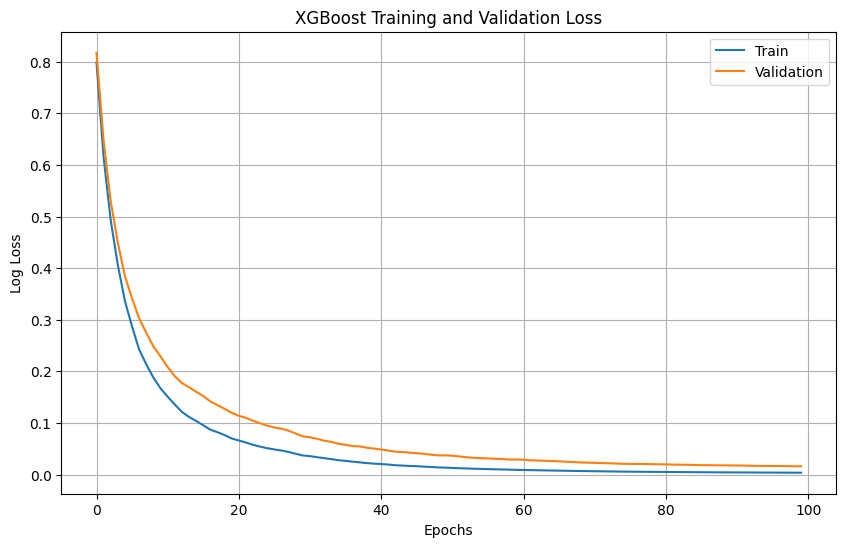

In [45]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Loading dataset
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Splitting data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Definening parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': 3,  # Number of classes in the dataset
    'eval_metric': ['merror', 'mlogloss']  # Metrics to monitor during training
}

# Training the model
evals_result = {}  # Dictionary to store evaluation results
num_rounds = 100  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_rounds, evals=[(dtrain, 'train'), (dval, 'eval')],
                evals_result=evals_result, early_stopping_rounds=10, verbose_eval=False)

# Extracting evaluation results
train_results = evals_result['train']
val_results = evals_result['eval']

# Extracting log loss values from evaluation results
train_logloss = train_results['mlogloss']
val_logloss = val_results['mlogloss']

# Plotting training and validation loss
epochs = len(train_logloss)
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, train_logloss, label='Train')
plt.plot(x_axis, val_logloss, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [55]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing the data
# Encoding categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Define features and target
X = data_encoded.drop('Attrition', axis=1)
y = data_encoded['Attrition']

# Checking for zero variance features
zero_variance_features = X.columns[X.var() == 0]
if len(zero_variance_features) > 0:
    X = X.drop(zero_variance_features, axis=1)

# Calculating VIF for each feature
X_with_const = sm.add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Displaying VIF and removing features with high VIF
print(vif)
high_vif_features = vif[vif["VIF"] > 10]["Feature"].tolist()

if 'const' in high_vif_features:
    high_vif_features.remove('const')  # Keeping the constant term

X = X.drop(high_vif_features, axis=1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Adding constant to the model (intercept)
X_scaled = sm.add_constant(X_scaled)

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fitting logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Printing the summary which includes p-values
print(result.summary())


                    Feature          VIF
0                     const   400.567317
1                       Age     2.010506
2            BusinessTravel     1.016064
3                Department     1.010083
4          DistanceFromHome     1.010951
5                 Education     1.010906
6            EducationField     1.012497
7                EmployeeID     1.001455
8                    Gender     1.020590
9                  JobLevel     1.020372
10                  JobRole     1.015083
11            MaritalStatus     1.023908
12            MonthlyIncome     1.024336
13       NumCompaniesWorked     1.250100
14        PercentSalaryHike     2.534188
15         StockOptionLevel     1.020814
16        TotalWorkingYears     3.090828
17    TrainingTimesLastYear     1.021559
18           YearsAtCompany     3.960355
19  YearsSinceLastPromotion     1.655423
20     YearsWithCurrManager     2.494064
21  EnvironmentSatisfaction     1.010744
22          JobSatisfaction     1.014839
23          Work